In [26]:
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('./../ADP_모의고사/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503


In [28]:
y = df['price']
X = df[['sqft_living']]

formula = 'price ~ sqft_living'
model = smf.ols(formula=formula, data=df).fit()

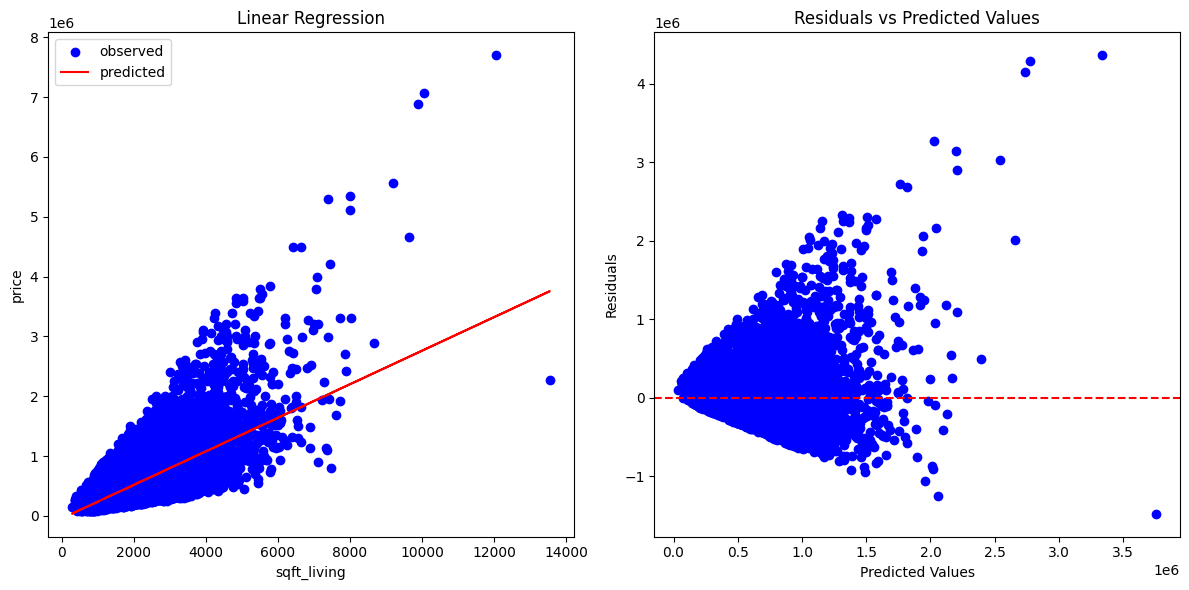

In [29]:
y_pred = model.predict(X)

fig,axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(X, y, color='blue', label='observed')
axes[0].plot(X, y_pred, color='red', label='predicted')
axes[0].set_xlabel('sqft_living')
axes[0].set_ylabel('price')
axes[0].set_title('Linear Regression')
axes[0].legend()


residuals = y - y_pred
axes[1].scatter(y_pred, residuals, color='blue')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

In [30]:
# 예시 데이터 (X는 DataFrame 또는 ndarray여야 함)
X_with_const = sm.add_constant(X)  # 상수항 추가
residuals = y - model.predict(X)

# Breusch-Pagan 검정
statistic, p_value, f_statistic, f_p_value = het_breuschpagan(residuals, X_with_const)

H0 = '잔차의 분산이 일정하다'  # 귀무가설
H1 = '잔차의 분산이 일정하지 않다'  # 대립가설

print(f'Breusch-Pagan 검정 통계량: {statistic}')
print(f'Breusch-Pagan 검정 p-value: {p_value}')

if p_value < 0.05:
    print(f'귀무가설 기각: {H1}')
else:
    print(f'귀무가설 채택: {H0}')

Breusch-Pagan 검정 통계량: 2441.033920857355
Breusch-Pagan 검정 p-value: 0.0
귀무가설 기각: 잔차의 분산이 일정하지 않다


In [ ]:
'''
Model 결정계수 : 0.493
Model p-value : 0.0000

sqft_living의 p-value : 0.0000
'''
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        09:29:49   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      